In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [76]:
women = pd.read_csv('athletes-women.csv')
men = pd.read_csv('athletes-men.csv')
#women = women.drop(columns=['Name', 'Region'])
#women = women.drop([10])
women.head()
# missing = men.isnull().sum()
# print(missing)


,Name,rank,region,longitude,latitude,age,height,weight,run400,run5k,fran,candj,snatch,deadlift,backsq,pullups,coach,certification,multiple,howlong
0,DelainaSnider,9,Canada West (British Columbia),125.9066° W,49.1530° N,34,66,152,67,1204,53,200,150,345,280,45,1,0,1,3
1,CamilleLeblanc-Bazinet,1,South West (Virginia),76.2875° W,36.7682° N,26,62,130,80,1180,124,230,190,300,310,80,1,1,1,3
2,SarahScholl,4,Atlantic,87.3595° W,36.5298° N,31,68,134,58,1110,125,195,155,305,295,40,0,1,0,3
3,KatrinTanjaDavidsdottir,1,"Europe (Reykjavik, Iceland)",21.9426° W,64.1466° N,21,67,152,67,1194,128,216,187,309,254,70,1,0,1,3
4,TalaynaFortunato,3,South East,81.7948° W,26.1420° N,34,67,150,69,1263,128,215,190,315,275,55,0,0,1,3


In [77]:
from sklearn.preprocessing import scale
df = women[['rank', 'age', 'run5k', 'pullups', 'fran']]
X = scale(df)
X[0:10,]

array([[-0.4113086 , -0.28080105, -1.09719481,  0.18389228, -2.36677404],
       [-0.87635601, -1.13458801, -1.31782682,  3.7332838 , -1.22315421],
       [-0.70196323, -0.60097116, -1.96133684, -0.32316365, -1.20704688],
       [-0.87635601, -1.66820486, -1.18912481,  2.71917194, -1.15872492],
       [-0.76009416, -0.28080105, -0.55480779,  1.19800414, -1.15872492],
       [-0.87635601, -1.24131138, -1.22589681,  2.61776075, -1.1426176 ],
       [-0.70196323, -0.8144179 , -1.29944081, -0.83021958, -1.12651028],
       [-0.58570138, -1.02786464, -0.30659678,  0.38671466, -1.12651028],
       [-0.87635601, -0.49424779, -1.36379182,  2.61776075, -1.11040296],
       [-0.81822509, -1.24131138, -1.0420368 ,  1.90788245, -1.07818831]])

In [78]:
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(X)

KMeans(n_clusters=2, random_state=5)

In [79]:
df.columns = ['rank', 'age', 'run5k', 'pullups', 'fran']

Text(0.5, 1.0, 'K-Means Classification Pullups')

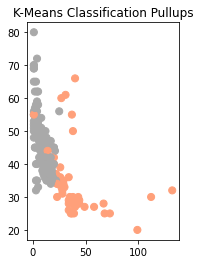

In [80]:
color_theme = np.array(['darkgray','lightsalmon'])

plt.subplot(1,2,2)
plt.scatter(x=df['rank'],y=df['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups')

Text(0.5, 1.0, 'K-Means Classification Run5k')

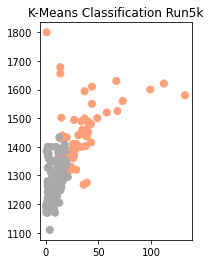

In [64]:
plt.subplot(1,2,2)
plt.scatter(x=df['rank'],y=df['run5k'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Run5k')

In [69]:
# df2 = df.iloc[:, lambda x: x.index >= 18 and x.index <= 34]
# df2 = df['age'].between(18, 34, inclusive=True)
mask = (df['age'] >= 18) & (df['age'] <= 34)
df2 = df.loc[mask]
df2.head()
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)

KMeans(n_clusters=2, random_state=5)

Text(0.5, 1.0, 'K-Means Classification Fran')

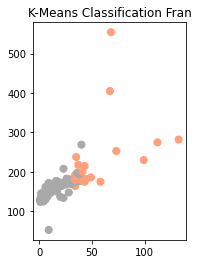

In [70]:
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['fran'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Fran')

Text(0.5, 1.0, 'K-Means Classification Fran')

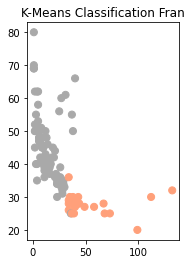

In [71]:
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Fran')

Text(0.5, 1.0, 'K-Means Classification Pullups')

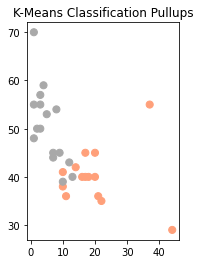

In [87]:
mask = (df['age'] >= 34) & (df['age'] <= 39)
df2 = df.loc[mask]
df2.head()
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups')